##Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Import data sets from Github

In [3]:
ztarget=pd.read_csv('https://raw.githubusercontent.com/chumdum/ASRT414Lab1/main/ztarget_msolson2.csv')
ztrain=pd.read_csv('https://raw.githubusercontent.com/chumdum/ASRT414Lab1/main/ztrain_msolson2.csv')

##Get data

In [4]:
#select each relevant column from the train datasets
zs=ztrain['z']
u=ztrain['modelMag_u']
g=ztrain['modelMag_g']
r=ztrain['modelMag_r']
i=ztrain['modelMag_i']
z=ztrain['modelMag_z']

#calculate average values
ubar=u.mean()
gbar=g.mean()
rbar=r.mean()
ibar=i.mean()
zbar=z.mean()
zsbar=zs.mean()

#calculate each covariance
cov11=ztrain.modelMag_u.cov(ztrain.modelMag_u)
cov22=ztrain.modelMag_g.cov(ztrain.modelMag_g)
cov33=ztrain.modelMag_r.cov(ztrain.modelMag_r)
cov44=ztrain.modelMag_i.cov(ztrain.modelMag_i)
cov55=ztrain.modelMag_z.cov(ztrain.modelMag_z)
cov12=ztrain.modelMag_u.cov(ztrain.modelMag_g)
cov13=ztrain.modelMag_u.cov(ztrain.modelMag_r)
cov14=ztrain.modelMag_u.cov(ztrain.modelMag_i)
cov15=ztrain.modelMag_u.cov(ztrain.modelMag_z)
cov23=ztrain.modelMag_g.cov(ztrain.modelMag_r)
cov24=ztrain.modelMag_g.cov(ztrain.modelMag_i)
cov25=ztrain.modelMag_g.cov(ztrain.modelMag_z)
cov34=ztrain.modelMag_r.cov(ztrain.modelMag_i)
cov35=ztrain.modelMag_r.cov(ztrain.modelMag_z)
cov45=ztrain.modelMag_i.cov(ztrain.modelMag_z)
covz1=ztrain.z.cov(ztrain.modelMag_u)
covz2=ztrain.z.cov(ztrain.modelMag_g)
covz3=ztrain.z.cov(ztrain.modelMag_r)
covz4=ztrain.z.cov(ztrain.modelMag_i)
covz5=ztrain.z.cov(ztrain.modelMag_z)

##Solve matrix equation for $b_1$, $b_2$, $b_3$, $b_4$ and $b_5$

In [5]:
A=np.array([
            [cov11,cov12,cov13,cov14,cov15],
            [cov12,cov22,cov23,cov24,cov25],
            [cov13,cov23,cov33,cov34,cov35],
            [cov14,cov24,cov34,cov44,cov45],
            [cov15,cov25,cov35,cov45,cov55]
])
C=np.array([covz1,covz2,covz3,covz4,covz5]).T
b=np.linalg.solve(A,C)

print('b=',b)

b= [ 0.01455839  0.08880067 -0.00486052 -0.0258905  -0.02536246]


##Calculate $b_0$

In [7]:
b0=zsbar-(b[0]*ubar+b[1]*gbar+b[2]*rbar+b[3]*ibar+b[4]*zbar)

print('b0=',b0)

b0= -0.8294912322890319


##Calculate bias in train set

In [9]:
n=len(u)
zis=[]
zip=[]
errs=[]
for j in range(n):
  zi=zs[j]
  zis.append(zi)
  zp=b0+b1*u[j]+b2*g[j]+b3*r[j]+b4*i[j]+b5*z[j]
  zip.append(zp)
  err=zi-zp
  errs.append(err)
sum(errs)/len(errs)
#bias in traininig, very small, bc we trained it on this set

-7.595576010594662e-16

##Get target data

In [10]:
#select each relevant column from the target datasets
zst=ztarget['z']
ut=ztarget['modelMag_u']
gt=ztarget['modelMag_g']
rt=ztarget['modelMag_r']
it=ztarget['modelMag_i']
zt=ztarget['modelMag_z']

#calculate average values
ubart=ut.mean()
gbart=gt.mean()
rbart=rt.mean()
ibart=it.mean()
zbart=zt.mean()
zsbart=zst.mean()

#calculate estimated redshifts using the coefficients from the train data set
zist=[]
zipt=[]
errst=[]
nt=len(ut)
for j in range(nt):
  zit=zst[j]
  zist.append(zit)
  zpt=b0+b1*ut[j]+b2*gt[j]+b3*rt[j]+b4*it[j]+b5*zt[j]
  zipt.append(zpt)
  errt=zit-zpt
  errst.append(errt)

#calculate average error
ebart=sum(errst)/len(errst)

#calculate RMS error
MSE = np.square(np.array(zist) - np.array(zipt)).mean()
RMSE=np.sqrt(MSE)
print('RMS Error=',RMSE)

RMS Error= 0.049492379725104785


##Plot estimated vs true redshift

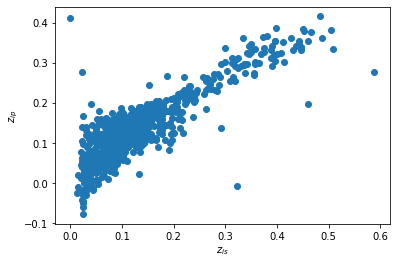

In [11]:
plt.scatter(zist,zipt)
plt.xlabel('$z_{is}$')
plt.ylabel('$z_{ip}$')
plt.savefig('redshiftplot.png')

##Plot error vs true redshift

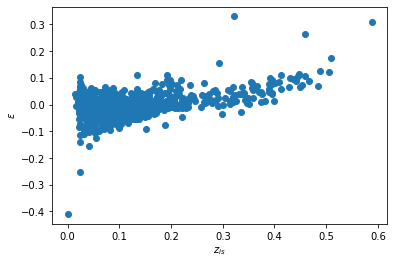

In [12]:
plt.scatter(zist,errst)
plt.xlabel('$z_{is}$')
plt.ylabel(r'$\varepsilon $')
plt.savefig('redshifterror.png')

##Histogram of error

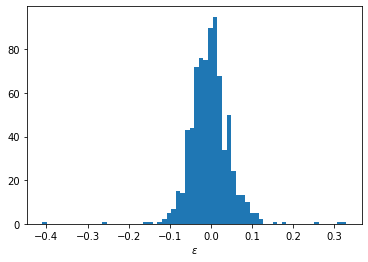

In [13]:
plt.hist(errst, bins = 'auto')
plt.xlabel(r'$\varepsilon$')
plt.savefig('errorhisto.png')

In [ ]:
ebart
#bias in redshift

-0.0026159257671277045

In [ ]:
RMSE
#other rms error for target

0.049492379725104785

##Identify Outliers

In [14]:
errsmag=[abs(x) for x in errst]
ztarget['err']=errsmag

#5 worst fit points from our model

In [15]:
ztarget['err'].nlargest(5)

728    0.410690
580    0.330119
448    0.310994
332    0.262768
531    0.253750
Name: err, dtype: float64

#5 best fit points from our model

In [16]:
ztarget['err'].nsmallest(5)

64     0.000031
76     0.000070
58     0.000276
224    0.000284
254    0.000287
Name: err, dtype: float64

#Calculate errors provided in data set

In [18]:
uerr=ztarget['modelMagErr_u']
gerr=ztarget['modelMagErr_g']
rerr=ztarget['modelMagErr_r']
ierr=ztarget['modelMagErr_i']
zerr=ztarget['modelMagErr_z']
n=len(uerr)
givenerrs=[]
for j in range(n):
  given=np.array([uerr[j],gerr[j],rerr[j],ierr[j],zerr[j]])
  e=np.linalg.norm(given)
  givenerrs.append(e)


#Plot estimated vs given errors

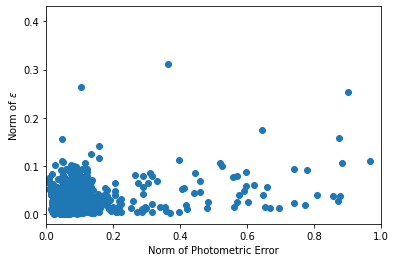

In [19]:
plt.scatter(givenerrs,errsmag)
plt.xlabel('Norm of Photometric Error')
plt.xlim([0,1])
plt.ylabel('Norm of $\epsilon$')
#plt.title('Calculated vs Given Error')
plt.savefig('errorplot.png')